In [656]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt

In [657]:
trainingPercent = 90
testingPercent = 10
epochs = 10000
learningRate = 0.01

In [658]:
def readData(fileName):
    df = pd.read_csv(fileName)
    return df

In [659]:
df = readData("insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [660]:
def encodeData(df):
    encode = LabelEncoder()
    df = df.iloc[:,:].values
    df[:,1] = encode.fit_transform(df[:,1])
    df[:,4] = encode.fit_transform(df[:,4])
    df[:,5] = encode.fit_transform(df[:,5])
    return df

In [661]:
df = encodeData(df)

In [662]:
print(df[0:5])

[[19 0 27.9 0 1 3 16884.924]
 [18 1 33.77 1 0 2 1725.5523]
 [28 1 33.0 3 0 2 4449.462]
 [33 1 22.705 0 0 1 21984.47061]
 [32 1 28.88 0 0 1 3866.8552]]


In [663]:
encode = OneHotEncoder(categorical_features=[1])
df = encode.fit_transform(df).toarray()
encode = OneHotEncoder(categorical_features=[5])
df = encode.fit_transform(df).toarray()
encode = OneHotEncoder(categorical_features=[7])
df = encode.fit_transform(df).toarray()

In [664]:
print(df[0])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.9000000e+01 2.7900000e+01
 0.0000000e+00 1.6884924e+04]


In [665]:
df = pd.DataFrame(df)

In [666]:
print(df.head())

    0    1    2    3    4    5    6    7     8       9    10           11
0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  19.0  27.900  0.0  16884.92400
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  18.0  33.770  1.0   1725.55230
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  28.0  33.000  3.0   4449.46200
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  33.0  22.705  0.0  21984.47061
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  32.0  28.880  0.0   3866.85520


In [667]:
def normalizeData(df):
    df[8] = df[8]/df[8].max()
    df[9] = df[9]/df[9].max()
    df[11] = df[11]/df[11].max()
    return df

In [668]:
df = normalizeData(df)

In [669]:
print(df.head())

    0    1    2    3    4    5    6    7         8         9    10        11
0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.296875  0.525127  0.0  0.264777
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.281250  0.635611  1.0  0.027059
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.437500  0.621118  3.0  0.069773
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.515625  0.427348  0.0  0.344744
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.500000  0.543572  0.0  0.060637


In [670]:
array = df.iloc[:,:].values

In [671]:
print(array[0])

[0.         0.         0.         1.         0.         1.
 1.         0.         0.296875   0.52512705 0.         0.26477671]


In [672]:
def shuffleData(df):
    shuffled = df.sample(frac=1).reset_index(drop=True)
    return shuffled

In [673]:
np.random.shuffle(array)

In [674]:
print(array[0])

[0.         1.         0.         0.         1.         0.
 1.         0.         0.453125   0.38085827 2.         0.07693863]


In [675]:
df = pd.DataFrame(array)

In [676]:
print(df.head())

    0    1    2    3    4    5    6    7         8         9    10        11
0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.453125  0.380858  2.0  0.076939
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.406250  0.548654  1.0  0.045521
2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.421875  0.585921  1.0  0.545809
3  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.578125  0.579334  0.0  0.584443
4  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.453125  0.557877  1.0  0.317981


In [677]:
def getTrainingAndTesting(df,trainingPercent):
    percentData = int(math.ceil((len(df))*(trainingPercent*0.01)))
    trainingFeatures = df.iloc[0:percentData,0:11].values
    trainingTargets = df.iloc[0:percentData,11:12].values
    testingFeatures = df.iloc[percentData:df.shape[0],0:11].values
    testingTargets = df.iloc[percentData:df.shape[0],11:12].values
    return trainingFeatures,trainingTargets,testingFeatures,testingTargets

In [678]:
trF,trT,teF,teT = getTrainingAndTesting(df,trainingPercent)

In [679]:
print(trF[0])

[0.         1.         0.         0.         1.         0.
 1.         0.         0.453125   0.38085827 2.        ]


In [680]:
def getMatrices(x):
    ones = np.ones([x.shape[0],1])
    x = np.concatenate((ones,x),axis=1)
    weights = np.zeros([1,x.shape[1]])
    return x,weights

In [681]:
x,w = getMatrices(trF)

In [682]:
print(w)
print(x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1.         0.         1.         ... 0.453125   0.38085827 2.        ]
 [1.         0.         0.         ... 0.40625    0.54865424 1.        ]
 [1.         0.         0.         ... 0.421875   0.58592133 1.        ]
 ...
 [1.         0.         0.         ... 0.5        0.46301525 0.        ]
 [1.         0.         0.         ... 0.875      0.47619048 0.        ]
 [1.         0.         0.         ... 0.921875   0.49689441 0.        ]]


In [683]:
def costFunction(x,train_y,weights):
    error = np.power(((x @ weights.T)-train_y),2)
    temp = np.sum(error)/(2 * len(x))
    return math.sqrt(temp/len(train_y))

In [684]:
def gradientDescent(x,y,epochs,learningRate,weights):
    error = np.zeros(epochs)
    for i in range(epochs):
        weights = weights - (learningRate/len(x)) * np.sum(x * (x @ weights.T - y), axis=0)
        error[i] = costFunction(x, y, weights)
    return weights,error

In [685]:
y,ww = getMatrices(teF)

In [686]:
print(y[0])

[1.         0.         0.         0.         1.         1.
 0.         0.         1.         0.8125     0.56841709 1.        ]


In [687]:
fw,error = gradientDescent(x,trT,epochs,learningRate,w)

In [688]:
print(fw)

[[ 0.01666938  0.01236114  0.00492266  0.0028857  -0.00350013 -0.18038337
   0.19705275  0.00829951  0.00836987  0.25329431  0.20778187  0.00676421]]


In [689]:
def getAccuracy(finalWeights,x,y):
    Y = np.dot(finalWeights,np.transpose(x))
    Y = Y.ravel()
    y = y.ravel()
    print(len(Y))
    print(len(y))
    counter = 0
    for i in range (0,len(Y)):
            if(Y[i].round() == y[i].round()):
                counter+=1
    accuracy = (float((counter*100))/float(len(Y)))
    return accuracy

In [690]:
accuracy = getAccuracy(fw,y,teT)
print(accuracy)

133
133
96.2406015037594


In [691]:
def drawPlot(epochs,error):
    dummy, axis = plt.subplots()  
    axis.plot(np.arange(epochs), error, 'r')  
    axis.set_xlabel('Epochs')  
    axis.set_ylabel('Error')  
    axis.set_title('Error vs. Epoch') 

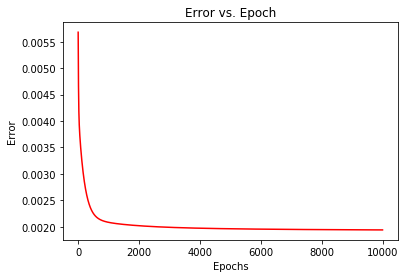

In [692]:
drawPlot(epochs,error)